# KNN ( k Nearest Neighbours)

- Simplest of all machine learning algorithms.
- Non-parametric algorithm used for classification and regression tasks. Non-parametric means there is no assumption 
  required for data distribution. So, kNN does not require any underlying assumption to be made in both classification 
  and regression tasks.
- In kNN classification, the output is a class membership. The given data point is classified based on the majority of 
  type of its neighbours. The data point is assigned to the most frequent class among its k nearest neighbours. 
  Usually k is a small positive integer. If k=1, then the data point is simply assigned to the class of that single nearest 
  neighbour.
- In kNN regression, the output is simply some property value for the object. This value is the average of the values of
  k nearest neighbours.
- kNN is a type of instance-based learning or lazy learning. Lazy learning means it does not require any training data points 
  for model generation. All training data will be used in the testing phase. This makes training faster and testing slower and 
  costlier. So, the testing phase requires more time and memory resources.
-In kNN, the neighbours are taken from a set of objects for which the class or the object property value is known. This can be 
 thought of as the training set for the kNN algorithm, though no explicit training step is required. In both classification and 
 regression kNN algorithm, we can assign weight to the contributions of the neighbours. So, nearest neighbours contribute more 
 to the average than the more distant ones.


### KNN working
It simply calculates the distance between a sample data point and all the other training data points. 
The distance can be Euclidean distance or Manhattan distance. Then, it selects the k nearest data points where k 
can be any integer. Finally, it assigns the sample data point to the class to which the majority of the k data 
points belong.


Now, we will see kNN algorithm in action. Suppose, we have a dataset with two variables which are classified as Red and Blue.
In kNN algorithm, k is the number of nearest neighbours. Generally, k is an odd number because it helps to decide the majority of the class. When k=1, then the algorithm is known as the nearest neighbour algorithm.

Now, we want to classify a new data point X into Blue class or Red class. Suppose the value of k is 3. The kNN algorithm starts by calculating the distance between X and all the other data points. It then finds the 3 nearest points with least distance to point X. In the final step of the kNN algorithm, we assign the new data point X to the majority of the class of the 3 nearest points. If 2 of the 3 nearest points belong to the class Red while 1 belong to the class Blue, then we classify the new data point as Red.



### Number of neighbours in kNN ?

A small value of k means that noise will have higher influence on the result. So, probability of overfitting is very high. 
A large value of k makes it computationally expensive in terms of time to build the kNN model. Also, a large value of 
k will have a smoother decision boundary which means lower variance but higher bias.


Choose an odd value of k if the number of classes is even. We can apply the elbow method to select the value of k. To optimize the results, we can use Cross Validation technique. Using the cross-validation technique, we can test the kNN algorithm with different values of k. The model which gives good accuracy can be considered to be an optimal choice. It depends on individual cases and at times best process is to run through each possible value of k and test our result.

elbow method- https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7

### KNN is lasy learner
Eager learners mean when giving training data points, we will construct a generalized model before performing prediction on given new points to classify. We can think of such learners as being ready, active and eager to classify new data points.

Lazy learning means there is no need for learning or training of the model and all of the data points are used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. They merely store the training dataset and waits until classification needs to perform. Lazy learners are also known as instance-based learners because lazy learners store the training points or instances, and all learning is based on instances.

Unlike eager learners, lazy learners do less work in the training phase and more work in the testing phase to make a classification.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
file="diabetes.csv"
diabetes_data = pd.read_csv(file)
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes_data.info(verbose=True) #verbose -> Whether to print the full summary.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### DataFrame.describe() 
This method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

count tells us the number of NoN-empty rows in a feature.
mean tells us the mean value of that feature.
std tells us the Standard Deviation Value of that feature.
min tells us the minimum value of that feature.
25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
max tells us the maximum value of that feature.

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Can minimum value of these columns be zero (0)?¶
On these columns, a value of zero does not make sense and thus indicates missing value.Following columns or variables 
have an invalid zero value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

In [17]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


To fill these Nan values the data distribution needs to be understood

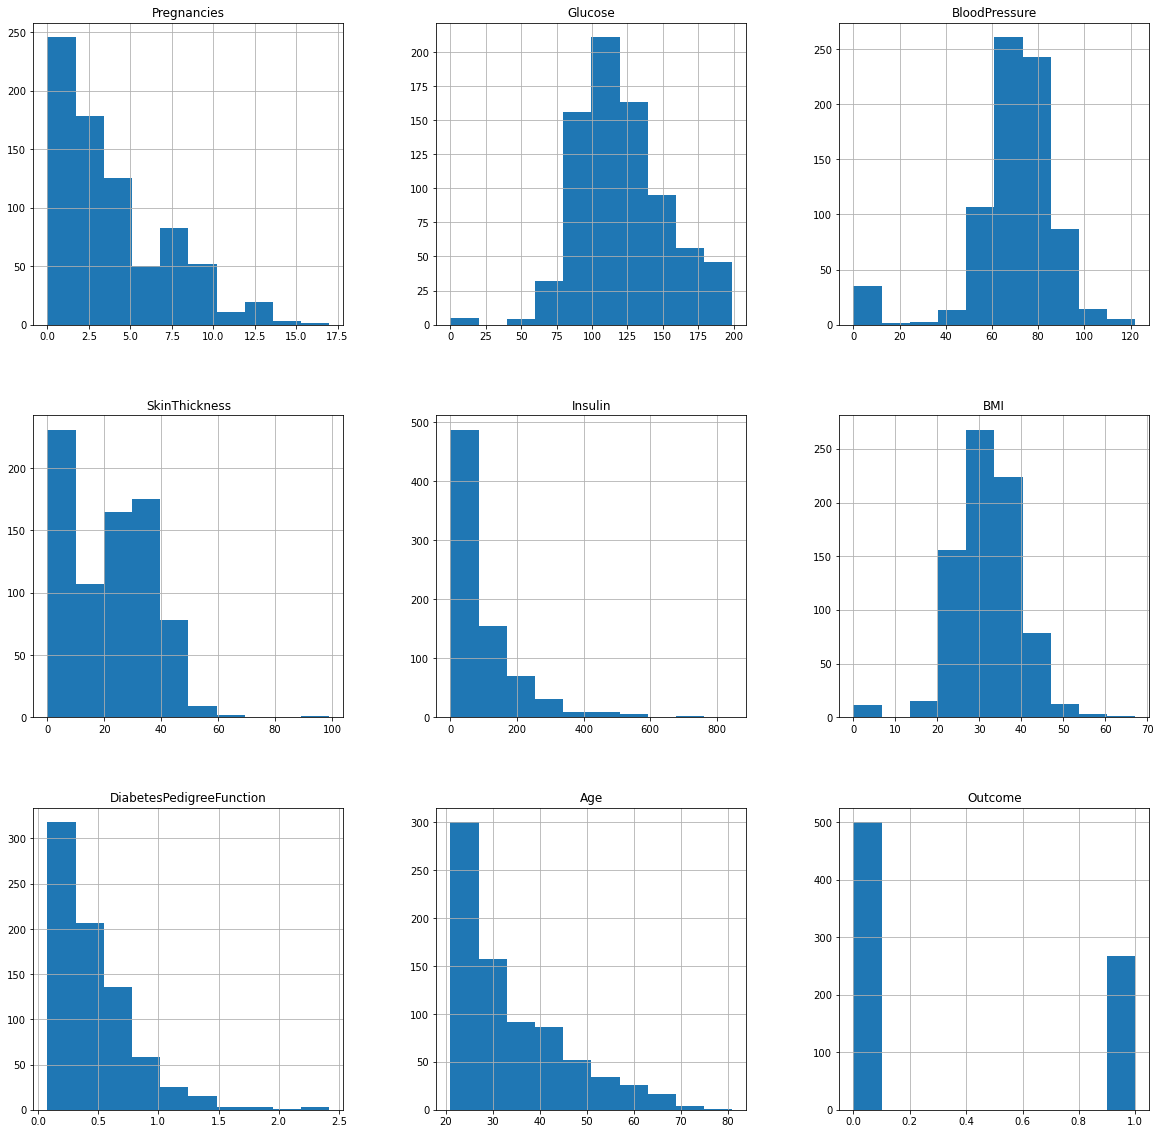

In [18]:
p = diabetes_data.hist(figsize = (20,20))

## Aiming to impute nan values for the columns in accordance with their distribution


In [19]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

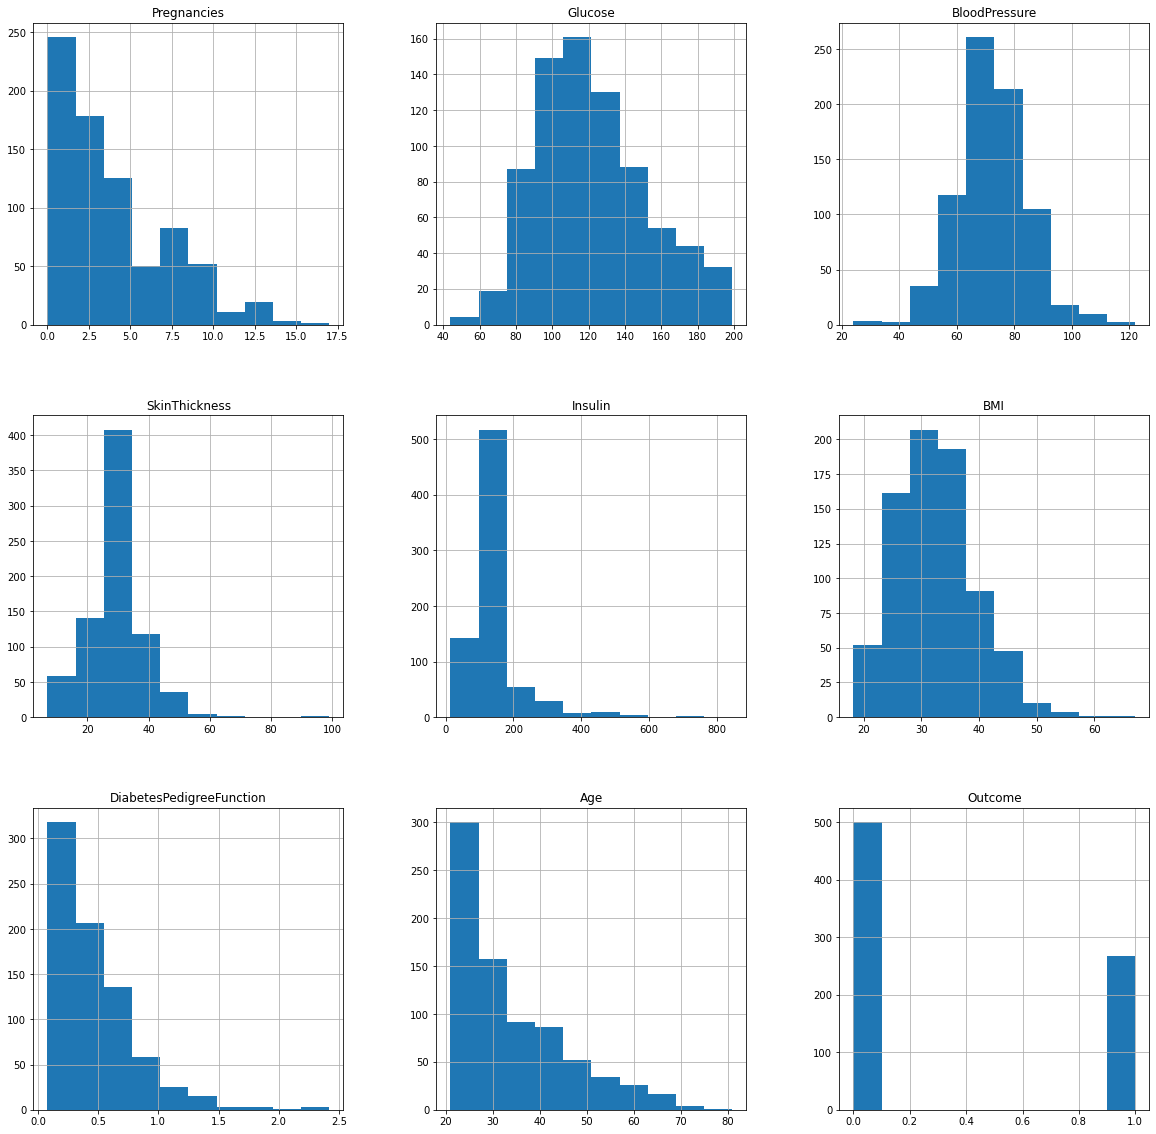

In [20]:
p = diabetes_data_copy.hist(figsize = (20,20))

Skewness
A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

In [21]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

0    500
1    268
Name: Outcome, dtype: int64


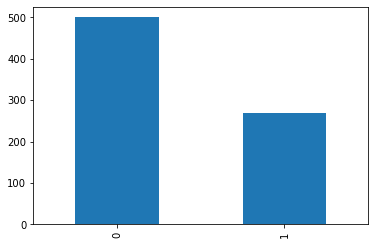

In [22]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was 
not present actually. The number of non-diabetics is almost twice the number of diabetic patients

### Pearson's Correlation Coefficient: 
It helps you find out the relationship between two quantities. It gives you the measure of 
the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 
1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

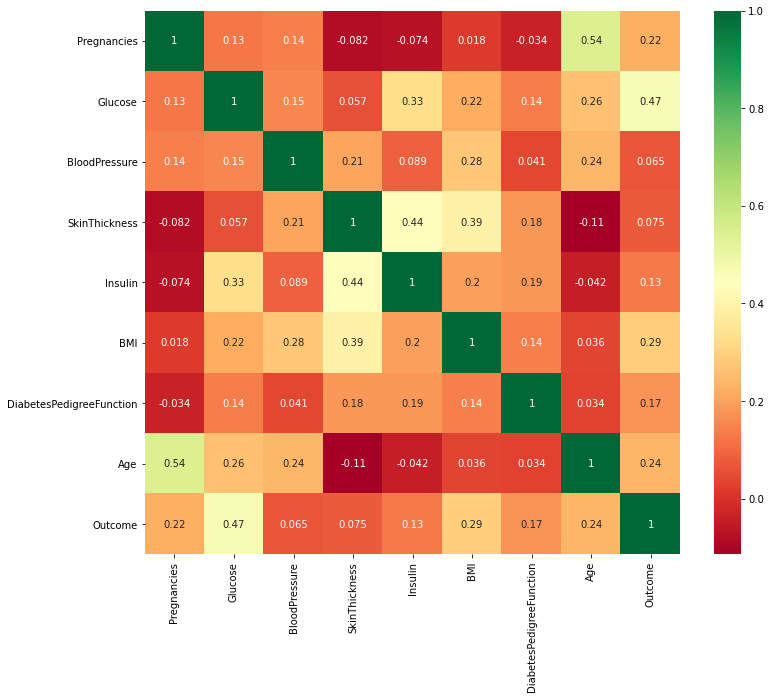

In [23]:
# unclean data
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  

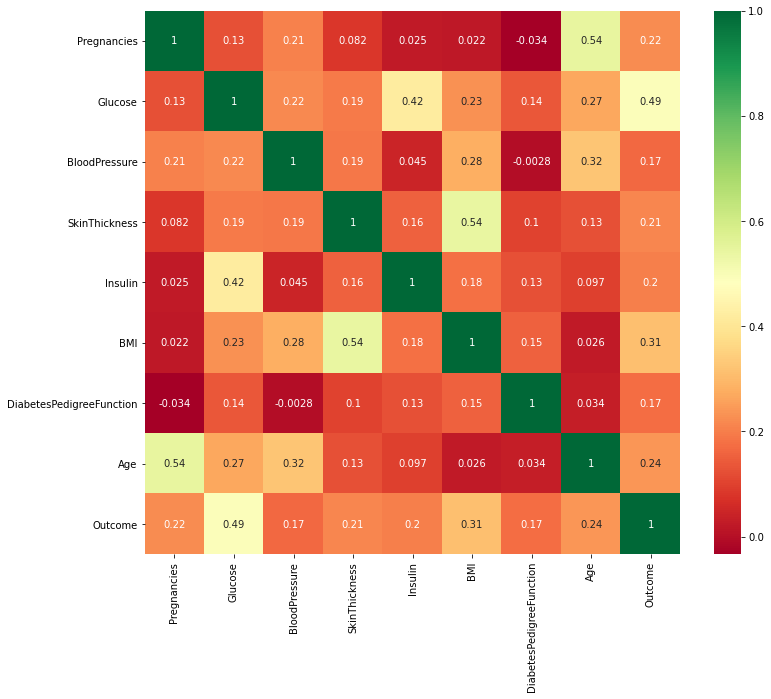

In [24]:
# clean data
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [26]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [27]:
y = diabetes_data_copy.Outcome

### Why Scaling the data for KNN?
It is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.
Distance calculation using two features whose magnitudes/ranges vary greatly.
Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

Imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.¶

In [28]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [31]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [32]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


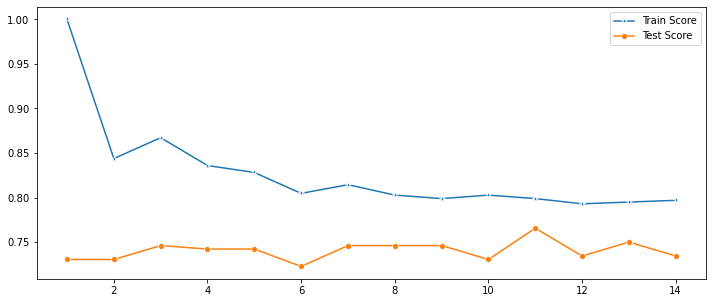

In [33]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

### The best result is captured at k = 11 hence 11 is used for the final model


In [34]:

knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

Text(0.5, 15.0, 'Predicted label')

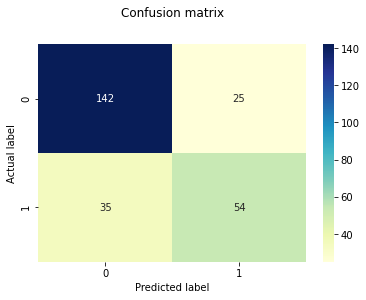

In [35]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Hyper Parameter optimization
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

In [35]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}
